# Import data

In [2]:
import os
import pandas as pd
import collections
import seaborn as sns
import re
pd.set_option('display.max_rows', None)
pd.set_option('max_colwidth', None)

In [12]:
def importCsvs(path, type="csv"):
    # Import the csv files
    # path: path to the csv files
    # return: dictionary of dataframes for each challenge and each predicate

    allDfs = {} # Dictionary of dataframes for each challenge and each predicate

    # Iterate over the folders
    for folder in os.listdir(path):
        # Iterate over the csv files
        for file in os.listdir(path + folder):
            # Read the file
            if type == "csv":
                df = pd.read_csv(path + folder + "/" + file)
            elif type == "json":
                df = pd.read_json(path + folder + "/" + file, lines=True)
            else:
                print("Error: unknown file type")
                return
            # Add the dataframe to the dictionary
            if folder not in allDfs:
                allDfs[folder] = {}
            cmd = re.sub("\..*", "", file)
            allDfs[folder][cmd] = df
            
        

    return allDfs

# Import the csv files
allDfs = importCsvs("../all/")
trainDfs = importCsvs("../train/")
testDfs = importCsvs("../test/", "json")

# Data analysis

Count number of submissions, correct and incorrect. 

In [13]:
def analyzeData(allDfs):
    analysisDf = pd.DataFrame({"Challenge": [], "Predicate": [], "NumSubmissions": [], "NumCorrect": [], "NumIncorrect": []})
    counter = collections.Counter()

    for challenge, cmdDfs in allDfs.items():
        for cmd, df in cmdDfs.items():
        # Update counter
            count = df["sat"].value_counts().to_dict()
            counter.update(count)
            analysisDf.loc[len(analysisDf)] = [
                challenge,
                cmd,
                len(df),
                len(df[df["sat"] == 0.0]),
                len(df[df["sat"] == 1.0])
            ]

    # Sort by number of submissions
    analysisDf = analysisDf.sort_values(by=['NumSubmissions'], ascending=False)

    print("Total number of submissions: " + str(analysisDf["NumSubmissions"].sum()))
    print("Total number of correct submissions: " + str(analysisDf["NumCorrect"].sum()))
    print("Total number of incorrect submissions: " + str(analysisDf["NumIncorrect"].sum()))

    # Show plot    
    sns.barplot(data=pd.DataFrame.from_dict(counter, orient="index").reset_index(), x="index", y=0, palette=["green", "red"])

    return analysisDf

## Analyze all submissions

Total number of submissions: 24278
Total number of correct submissions: 10636
Total number of incorrect submissions: 13642


,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect
80,YH3ANm7Y5Qe5dSYem,inv11,598,78,520
83,YH3ANm7Y5Qe5dSYem,inv14,544,57,487
45,gAeD3MTGCCv8YNTaK,weaklyConnected,531,78,453
96,zoEADeCW2b2suJB2k,inv4,529,70,459
15,9jPK8KBWzjFmBx4Hb,prop5,424,65,359
81,YH3ANm7Y5Qe5dSYem,inv12,420,61,359
44,gAeD3MTGCCv8YNTaK,undirected,412,209,203
3,9jPK8KBWzjFmBx4Hb,prop12,409,37,372
16,9jPK8KBWzjFmBx4Hb,prop6,386,119,267
71,sDLK7uBCbgZon3znd,inv7,380,157,223


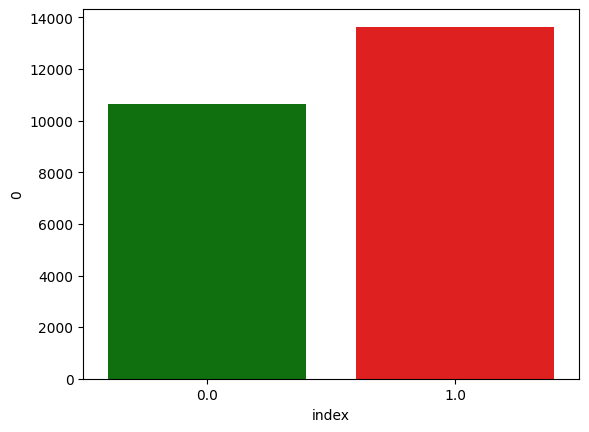

In [14]:
analyzeData(allDfs)

## Analyze train data

Total number of submissions: 21231
Total number of correct submissions: 9321
Total number of incorrect submissions: 11910


,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect
80,YH3ANm7Y5Qe5dSYem,inv11,523,59,464
45,gAeD3MTGCCv8YNTaK,weaklyConnected,444,64,380
15,9jPK8KBWzjFmBx4Hb,prop5,423,65,358
3,9jPK8KBWzjFmBx4Hb,prop12,408,37,371
83,YH3ANm7Y5Qe5dSYem,inv14,404,41,363
16,9jPK8KBWzjFmBx4Hb,prop6,386,119,267
81,YH3ANm7Y5Qe5dSYem,inv12,383,41,342
96,zoEADeCW2b2suJB2k,inv4,377,54,323
1,9jPK8KBWzjFmBx4Hb,prop10,348,53,295
102,zRAn69AocpkmxXZnW,inv11,339,73,266


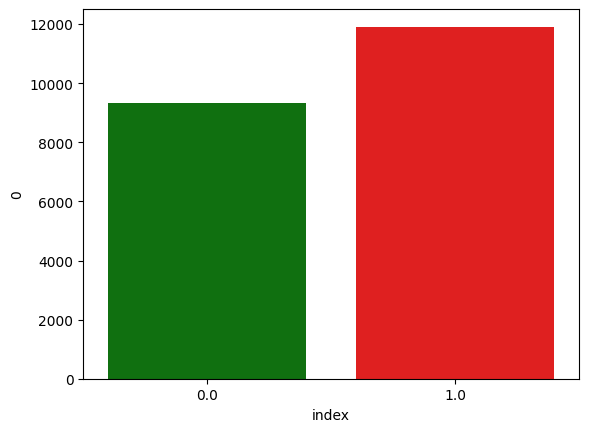

In [15]:
analyzeData(trainDfs)

## Analyze test data

Total number of submissions: 2059
Total number of correct submissions: 716
Total number of incorrect submissions: 1343


,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect
47,YH3ANm7Y5Qe5dSYem,inv14,103,12,91
60,zoEADeCW2b2suJB2k,inv4,101,10,91
29,PQAJE67kz8w5NWJuM,inv7,79,22,57
70,zRAn69AocpkmxXZnW,inv15,78,1,77
12,gAeD3MTGCCv8YNTaK,undirected,70,17,53
44,YH3ANm7Y5Qe5dSYem,inv11,60,13,47
55,YH3ANm7Y5Qe5dSYem,inv8,57,18,39
13,gAeD3MTGCCv8YNTaK,weaklyConnected,57,8,49
28,PQAJE67kz8w5NWJuM,inv6,56,11,45
48,YH3ANm7Y5Qe5dSYem,inv15,55,4,51


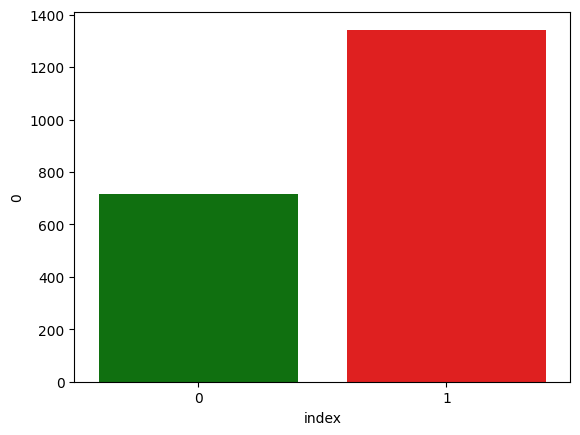

In [16]:
analyzeData(testDfs)

# Graph Analysis

In [4]:
def importGraphAnalytics(path):
    return pd.read_csv(path)

def analyzeGraphAnalytics(df):
    total_submissions = 0
    total_correct = 0
    total_incorrect = 0
    total_edges = 0

    for index, row in df.iterrows():
        total_submissions += row["NumSubmissions"]
        total_correct += row["NumCorrect"]
        total_incorrect += row["NumIncorrect"]
        total_edges += row["NumEdges"]

    print("Total number of submissions: " + str(total_submissions))
    print("Total number of correct submissions: " + str(total_correct))
    print("Total number of incorrect submissions: " + str(total_incorrect))
    print("Total number of edges: " + str(total_edges))

PATH = "../../higena/src/test/outputs/"

In [25]:
df = importGraphAnalytics(PATH + "graph_statistics.csv")
analyzeGraphAnalytics(df)

Total number of submissions: 7745
Total number of correct submissions: 991
Total number of incorrect submissions: 6754
Total number of edges: 11832


In [63]:
df

,Challenge,Predicate,NumSubmissions,NumCorrect,NumIncorrect,NumEdges
0,jyS8Bmceejj9pLbTW,Inv1,30,7,23,48
1,jyS8Bmceejj9pLbTW,Inv2,55,7,48,75
2,jyS8Bmceejj9pLbTW,Inv3,39,14,25,49
3,jyS8Bmceejj9pLbTW,Inv4,95,18,77,115
4,PQAJE67kz8w5NWJuM,inv1,24,14,10,43
5,PQAJE67kz8w5NWJuM,inv2,20,5,15,38
6,PQAJE67kz8w5NWJuM,inv3,27,6,21,42
7,PQAJE67kz8w5NWJuM,inv4,39,13,26,68
8,PQAJE67kz8w5NWJuM,inv5,75,9,66,143
9,PQAJE67kz8w5NWJuM,inv6,58,11,47,111


# Hint Analysis

## Normal

Import data.

In [19]:
df = pd.read_json(PATH + "hints_statistics.json", lines=True)
total_hints = len(df)

Analyze number of new nodes in the graph.

In [6]:
count = df["isNewNode"].value_counts()
print("Total number of hints: " + str(total_hints))
print("Number of old submissions: " + str(count[1]) + " (" + str(round(count[1] / total_hints * 100, 2)) + "%)")
print("Number of new submissions: " + str(count[0]) + " (" + str(round(count[0] / total_hints * 100, 2)) + "%)")

Total number of hints: 1343
Number of old submissions: 325 (24.2%)
Number of new submissions: 1018 (75.8%)


In [20]:
count = df["createdShorterPath"].value_counts()
print("Total number of hints: " + str(total_hints))
print("Number of old submissions: " + str(count[1]) + " (" + str(round(count[1] / total_hints * 100, 2)) + "%)")
print("Number of new submissions: " + str(count[0]) + " (" + str(round(count[0] / total_hints * 100, 2)) + "%)")

Total number of hints: 1343
Number of old submissions: 90 (6.7%)
Number of new submissions: 1253 (93.3%)


## No new paths

Not creating new path when TED too long.

Import data.

In [15]:
df = pd.read_json(PATH + "bad_paths_hints_statistics.json", lines=True)
total_hints = len(df)

Analyze distances.


In [16]:
longer_paths = df[df["srcDstTED"] < df["totalTED"]]
equal_paths = df[df["srcDstTED"] == df["totalTED"]]
num_longer_paths = len(longer_paths)
num_equal_paths = len(equal_paths)

print("Total number of hints: " + str(total_hints))
print("Number of hints with longer paths: " + str(num_longer_paths) + " (" + str(round(num_longer_paths / total_hints * 100, 2)) + "%)")
print("Number of hints with equal paths: " + str(num_equal_paths) + " (" + str(round(num_equal_paths / total_hints * 100, 2)) + "%)")


Total number of hints: 1343
Number of hints with longer paths: 90 (6.7%)
Number of hints with equal paths: 1253 (93.3%)


## No branch swap

Not swapping branches for commutative operations with common branches.

In [13]:
df = pd.read_json(PATH + "no_swap_hints_statistics.json", lines=True)
total_hints = len(df)

## GumTree Mapping

Using gumtree mapping instead of apted.

In [ ]:
gumtree_df = pd.read_json(PATH + "gumtree_hints_statistics.json", lines=True)
total_hints = len(gumtree_df)

Check which actions are different.

In [ ]:
# TODO